## Question Country vs Date Joined
Do certain geographic regions see a higher concentration of Unicorns joining during specific periods?


In [1]:
# Import Dependenciews
from matplotlib import pyplot as plt
from scipy.stats import linregress
import numpy as np
from sklearn import datasets
import pandas as pd
from pathlib import Path

In [2]:
# Load and read CSV file
csvPath = Path("Project-1-CSVs/merged_df.csv")
mergedDF = pd.read_csv(csvPath, encoding="UTF-8")

# Drop original CSV indexing
mergedDF = mergedDF.drop(columns=['Unnamed: 0'])

# Display
mergedDF.head(10)

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
0,ByteDance,$140,$225,225.0,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,SpaceX,$127,$137,150.0,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,SHEIN,$100,$66,66.0,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,Stripe,$95,$50,65.0,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,Canva,$40,$40,25.4,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."
5,Checkout.com,$40,$11,11.0,5/2/2019,United Kingdom,London,Fintech,"Tiger Global Management, Insight Partners, DST..."
6,Instacart,$39,$12,NaN,12/30/2014,United States,San Francisco,"Supply chain, logistics, & delivery","Khosla Ventures, Kleiner Perkins Caufield & By..."
7,Databricks,$38,$31,43.0,2/5/2019,United States,San Francisco,Data management & analytics,"Andreessen Horowitz, New Enterprise Associates..."
8,Revolut,$33,$33,33.0,4/26/2018,United Kingdom,London,Fintech,"index Ventures, DST Global, Ribbit Capital"
9,Epic Games,$31.50,$31.50,22.5,10/26/2018,United States,Cary,Other,"Tencent Holdings, KKR, Smash Ventures"


In [3]:
# Reformat date Joined
mergedDF['Date Joined'] = pd.to_datetime(mergedDF['Date Joined'], format = '%m/%d/%Y')

# Create a sorted DataFrame
sortedMergedDF = pd.DataFrame(mergedDF)

# Sort companies from earliest join date to most recent join date
sortedMergedDF = sortedMergedDF.sort_values(by="Date Joined", ascending = True)

# Display top 10 (earliest joined)
sortedMergedDF.head(10)


,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors
725,Veepee,$1.38,$1.38,1.38,2007-07-02,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,"Summit Partners, Qatar Holding"
125,Vice Media,$5.70,NaN,NaN,2011-04-02,United States,Brooklyn,Internet software & services,"Technology Crossover Ventures, A&E Television ..."
105,Klarna,$6.70,$6.70,6.70,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita..."
447,Trendy Group International,$2,$2,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,L Capital Partners
11,Fanatics,$27,$31,31.00,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H..."
1,SpaceX,$127,$137,150.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
448,Avant,$2,$2,2.00,2012-12-17,United States,Chicago,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital"
615,Mu Sigma,$1.50,$1.50,1.50,2013-02-07,United States,Northbrook,Data management & analytics,"Sequoia Capital, General Atlantic"
93,Automattic,$7.50,$7.50,7.50,2013-05-27,United States,San Francisco,Internet software & services,"Insight Venture Partners, Lowercase Capital, P..."
930,Lookout,$1,$1,1.00,2013-10-10,United States,San Francisco,Cybersecurity,"Accel Partners, Greylock Partners, Lowercase C..."


In [4]:
# Isolate the year from date
sortedMergedDF['Year Joined'] = sortedMergedDF['Date Joined'].dt.year

# Group by year and count number of companies joined per year
start_year = 2007
end_year = 2015
intervalOneFilteredDF = sortedMergedDF[(sortedMergedDF['Year Joined'] >= start_year) & (sortedMergedDF['Year Joined'] <= end_year)]
intervalOneFilteredDF

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors,Year Joined
725,Veepee,$1.38,$1.38,1.38,2007-07-02,France,La Plaine Saint-Denis,E-commerce & direct-to-consumer,"Summit Partners, Qatar Holding",2007
125,Vice Media,$5.70,NaN,NaN,2011-04-02,United States,Brooklyn,Internet software & services,"Technology Crossover Ventures, A&E Television ...",2011
105,Klarna,$6.70,$6.70,6.70,2011-12-12,Sweden,Stockholm,Fintech,"Institutional Venture Partners, Sequoia Capita...",2011
447,Trendy Group International,$2,$2,2.00,2012-02-13,Hong Kong,Kowloon,Consumer & retail,L Capital Partners,2012
11,Fanatics,$27,$31,31.00,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H...",2012
1,SpaceX,$127,$137,150.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
448,Avant,$2,$2,2.00,2012-12-17,United States,Chicago,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital",2012
615,Mu Sigma,$1.50,$1.50,1.50,2013-02-07,United States,Northbrook,Data management & analytics,"Sequoia Capital, General Atlantic",2013
93,Automattic,$7.50,$7.50,7.50,2013-05-27,United States,San Francisco,Internet software & services,"Insight Venture Partners, Lowercase Capital, P...",2013
930,Lookout,$1,$1,1.00,2013-10-10,United States,San Francisco,Cybersecurity,"Accel Partners, Greylock Partners, Lowercase C...",2013


         Country  Number of Unicorns
0          China                  20
1       Colombia                   1
2         France                   2
3      Hong Kong                   1
4          India                   3
5    South Korea                   2
6         Sweden                   1
7  United States                  26


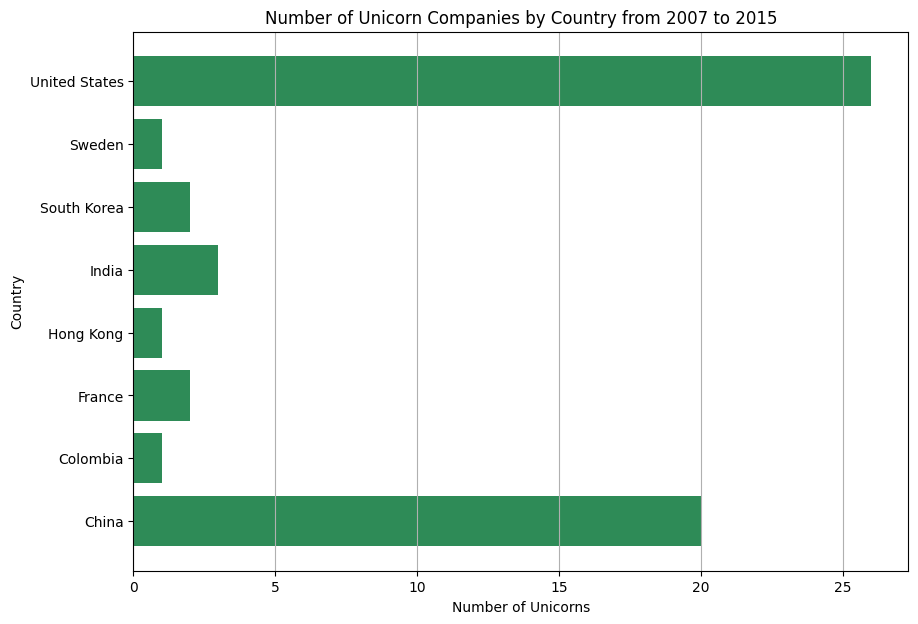

In [13]:
intOneDF = intervalOneFilteredDF.groupby('Country').size().reset_index(name='Number of Unicorns')
print(intOneDF)

# Plotting the data
plt.figure(figsize=(10, 7))
plt.barh(intOneDF['Country'], intOneDF['Number of Unicorns'], color='seagreen')
plt.title(f'Number of Unicorn Companies by Country from {start_year} to {end_year}')
plt.xlabel('Number of Unicorns')
plt.ylabel('Country')
plt.grid(axis='x')

# Save plot to file
plt.savefig("images/CountryvsDateJoined/Number of Unicorn Companies by Country (2007-2015)")
plt.show()

In [9]:
# Group by year and count number of companies joined per year
startYear = 2016
endYear = 2022
intervalTwoFilteredDF = sortedMergedDF[(sortedMergedDF['Year Joined'] >= startYear) & (sortedMergedDF['Year Joined'] <= endYear)]
intervalTwoFilteredDF

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors,Year Joined
842,L&P Cosmetic,$1.19,$1.19,1.19,2016-01-01,South Korea,Seoul,Consumer & retail,CDIB Capital,2016
947,MindMaze,$1,$1,1.00,2016-01-28,Switzerland,Lausanne,Health,Hinduja Group,2016
52,Chehaoduo,$10,$10,10.00,2016-03-12,China,Beijing,E-commerce & direct-to-consumer,"Sequoia Capital China, GX Capital",2016
14,Xiaohongshu,$20,$20,20.00,2016-03-31,China,Shanghai,E-commerce & direct-to-consumer,"GGV Capital, ZhenFund, Tencent",2016
124,Lianjia,$5.77,$5.77,5.77,2016-04-07,China,Beijing,E-commerce & direct-to-consumer,"Tencent, Baidu, Huasheng Capital",2016
...,...,...,...,...,...,...,...,...,...,...
617,Orna Therapeutics,$1.50,$1.50,1.50,2022-08-16,United States,Cambridge,Health,"MPM Capital, Astellas Venture Management, F2 V...",2022
537,MEGAZONE,$1.83,$1.83,1.83,2022-08-16,South Korea,Seoul,Internet,"Salesforce Ventures, ATP Investment, kt invest...",2022
744,Shiprocket,$1.30,$1.30,1.23,2022-08-16,India,New Delhi,Internet,"Bertelsmann India Investments, March Capital P...",2022
573,Incredible Health,$1.65,$1.65,1.65,2022-08-17,United States,San Francisco,Internet software & services,"Obvious Ventures, Andreessen Horowitz, NFX",2022


                 Country  Number of Unicorns
0              Argentina                   1
1              Australia                   8
2                Austria                   2
3                Bahamas                   1
4                Belgium                   3
5                Bermuda                   1
6                 Brazil                  17
7                 Canada                  19
8                  Chile                   2
9                  China                 154
10              Colombia                   2
11               Croatia                   2
12        Czech Republic                   1
13               Denmark                   2
14               Ecuador                   1
15               Estonia                   5
16               Finland                   4
17                France                  22
18               Germany                  29
19             Hong Kong                   6
20                 India                  67
21        

<Figure size 2500x700 with 0 Axes>

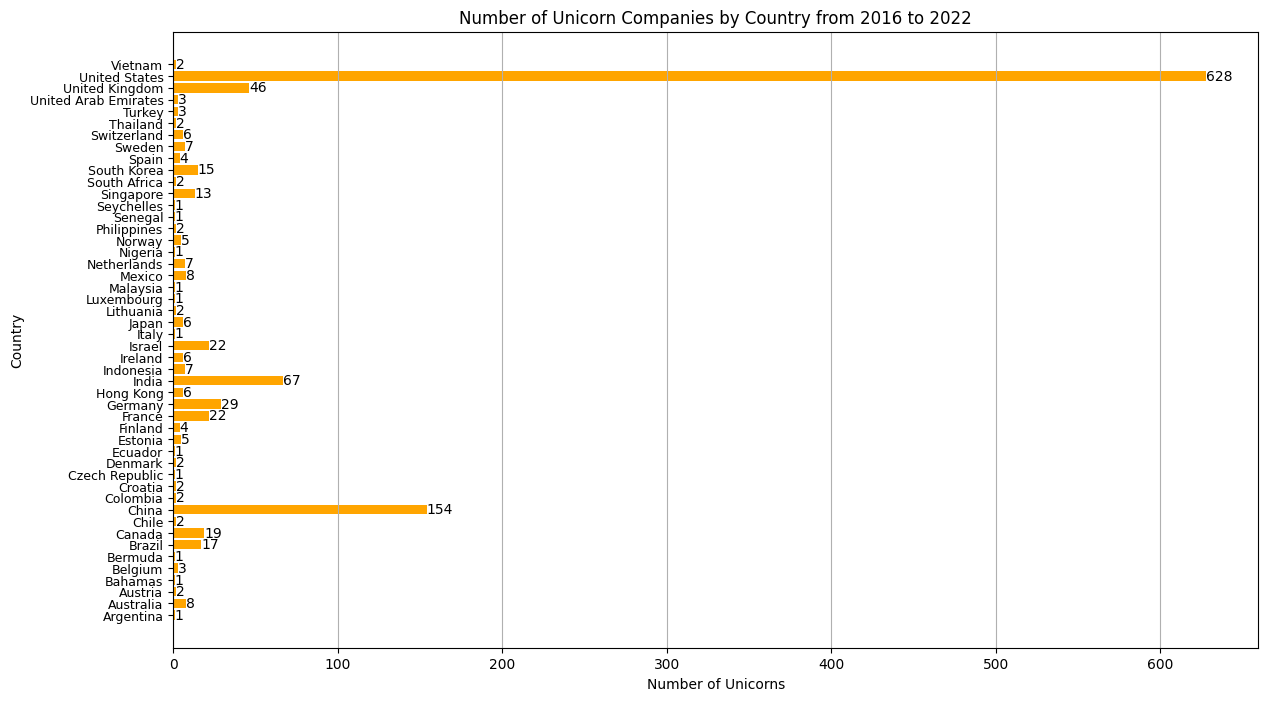

In [12]:
intTwoDF = intervalTwoFilteredDF.groupby('Country').size().reset_index(name='Number of Unicorns')

print(intTwoDF)

# Plotting the data
plt.figure(figsize=(25, 7))
# Plotting the data
plt.figure(figsize=(14, 8))  # Increase the figure size
bars = plt.barh(intTwoDF['Country'], intTwoDF['Number of Unicorns'], color='orange')
yTickPosition = range(len(intTwoDF))
# Add data labels
for bar in bars:
    plt.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f'{bar.get_width()}', 
             va='center', ha='left')
plt.title(f'Number of Unicorn Companies by Country from {startYear} to {endYear}')
plt.xlabel('Number of Unicorns')
plt.ylabel('Country')
plt.yticks(yTickPosition, intTwoDF['Country'], fontsize=9)
plt.grid(axis='x')

# Save plot to file
plt.savefig("images/CountryvsDateJoined/Number of Unicorn Companies by Country (2016-2022)")
plt.show()

In [15]:
us_companies = sortedMergedDF[sortedMergedDF['Country'] == 'United States']

us_companies = pd.DataFrame(us_companies)

us_companies

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors,Year Joined
125,Vice Media,$5.70,NaN,NaN,2011-04-02,United States,Brooklyn,Internet software & services,"Technology Crossover Ventures, A&E Television ...",2011
11,Fanatics,$27,$31,31.00,2012-06-06,United States,Jacksonville,E-commerce & direct-to-consumer,"SoftBank Group, Andreessen Horowitz, Temasek H...",2012
1,SpaceX,$127,$137,150.00,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",2012
448,Avant,$2,$2,2.00,2012-12-17,United States,Chicago,Artificial intelligence,"RRE Ventures, Tiger Global, August Capital",2012
615,Mu Sigma,$1.50,$1.50,1.50,2013-02-07,United States,Northbrook,Data management & analytics,"Sequoia Capital, General Atlantic",2013
...,...,...,...,...,...,...,...,...,...,...
787,ClassDojo,$1.25,$1.25,1.25,2022-07-21,United States,San Francisco,Edtech,"General Catalyst, Unkork Capital, Tencent Hold...",2022
1206,Unstoppable Domains,$1,$1,1.00,2022-07-27,United States,Las Vegas,Internet software & services,"Boost VC, Draper Associates, Gaingels",2022
926,Flow,$1,$1,1.00,2022-08-15,United States,New York,Fintech,Andreessen Horowitz,2022
617,Orna Therapeutics,$1.50,$1.50,1.50,2022-08-16,United States,Cambridge,Health,"MPM Capital, Astellas Venture Management, F2 V...",2022


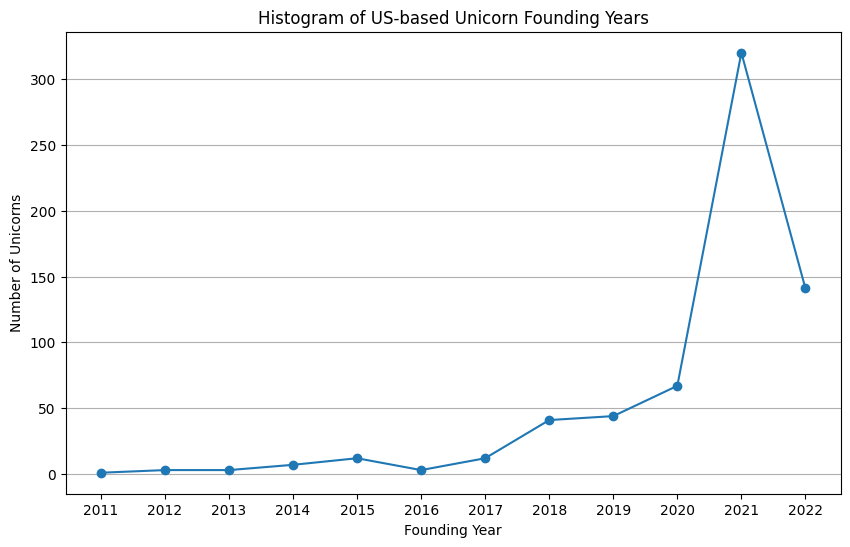

In [16]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.plot(us_companies['Year Joined'].value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Histogram of US-based Unicorn Founding Years')
plt.xlabel('Founding Year')
plt.ylabel('Number of Unicorns')
plt.grid(axis='y')
plt.xticks(range(min(us_companies['Year Joined']), max(us_companies['Year Joined']) + 1))  # Adjust x-ticks for clarity

# Save plot to file
plt.savefig("images/CountryvsDateJoined/Histogram of US-Based Unicorn Founding Years")
plt.show()

In [17]:
china_companies = sortedMergedDF[sortedMergedDF['Country'] == 'China']

china_companies = pd.DataFrame(china_companies)

china_companies

,Company,2022_Valuation,2023_Valuation,2024_Valuation,Date Joined,Country,City,Industry,Select Investors,Year Joined
697,Koudai,$1.40,$1.40,1.40,2014-10-23,China,Beijing,E-commerce & direct-to-consumer,"New Enterprise Associates, Tiger Global manage...",2014
935,LinkSure Network,$1,$1,1.00,2015-01-01,China,Shanghai,Mobile & telecommunications,NaN,2015
551,Apus Group,$1.73,$1.73,1.73,2015-01-16,China,Beijing,Mobile & telecommunications,"Redpoint Ventures, QiMing Venture Partners, Ch...",2015
937,BeiBei,$1,$1,1.00,2015-01-22,China,Hangzhou,E-commerce & direct-to-consumer,"Banyan Capital, New Horizon Capital, IDG Capit...",2015
18,DJI Innovations,$15,$15,15.00,2015-01-23,China,Shenzhen,Hardware,"Accel Partners, Sequoia Capital",2015
...,...,...,...,...,...,...,...,...,...,...
773,Greater Bay Technology,$1.26,$1.26,1.26,2022-04-02,China,Guangzhou,Hardware,"Tencent Holdings, Utrust Venture Capital, GF X...",2022
614,Gokin Solar,$1.51,$2.88,2.88,2022-04-13,China,Zhuhai,Other,"IDG Capital, Puluo Capital, Midea Capital",2022
516,ROX Motor,$2,$2,2.00,2022-04-29,China,Shanghai,Auto & transportation,"Sequoia Capital China, IDG Capital, Qiming Ven...",2022
734,Jaguar Microsystems,$1.34,$1.34,1.34,2022-06-23,China,Shenzhen,Hardware,"Tencent Holdings, Glory Ventures, Shenzhen Cap...",2022


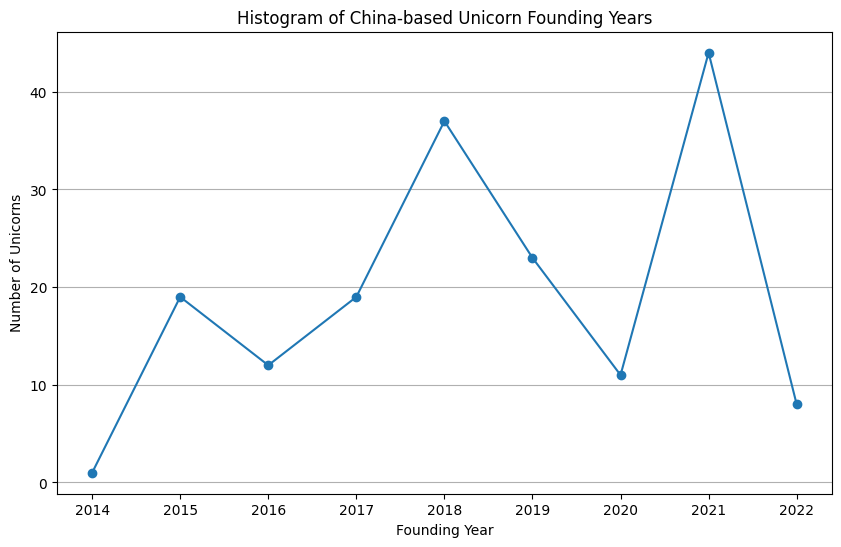

In [18]:
# Create a histogram
plt.figure(figsize=(10, 6))
plt.plot(china_companies['Year Joined'].value_counts().sort_index(), marker='o', linestyle='-')
plt.title('Histogram of China-based Unicorn Founding Years')
plt.xlabel('Founding Year')
plt.ylabel('Number of Unicorns')
plt.grid(axis='y')
plt.xticks(range(min(china_companies['Year Joined']), max(china_companies['Year Joined']) + 1))  # Adjust x-ticks for clarity

# Save plot to file
plt.savefig("images/CountryvsDateJoined/China Histogram")
plt.show()